# Opponent's cards detection

In [2]:
import sys
sys.path.append("..")
from hearthstone.processing import Factory
import hearthstone.sides as hsd

In [3]:
import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import skimage.exposure
import numpy as np

from skimage.filters import sobel
from scipy import ndimage

import hearthstone.tools

import matplotlib.pyplot as plt
%matplotlib inline

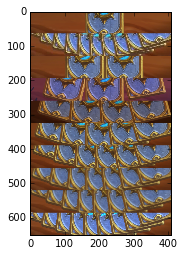

In [5]:
from os import listdir
from os.path import join
def get_images_list(folder, resolution=(1080, 1920)):
    images_list = []
    for f in sorted(listdir(folder)):
        img = skimage.io.imread(join(folder, f))
        img = skimage.transform.resize(img, resolution)
        # img = np.asarray(img, np.uint8)

        # plt.show(img)
        # plt.show()
        images_list.append(img)
    return images_list


def put_together(flist, loc, shape):
    result = None
    for image in flist:
        img = Factory.cut_off_image(image, loc, shape)
        result = img if result is None else np.vstack((result, img))
    return result

images = get_images_list('../data/opponents_cards/')
stacked_image = hearthstone.tools.put_together(images, loc=hsd.OPPONENT_CARDS.loc, shape=hsd.OPPONENT_CARDS.shape)
# Factory.cut_off_image(image, (750, 0), (430, 65))

plt.imshow(stacked_image)
plt.imsave('../data/opponent_cards_1-10.jpg', stacked_image)

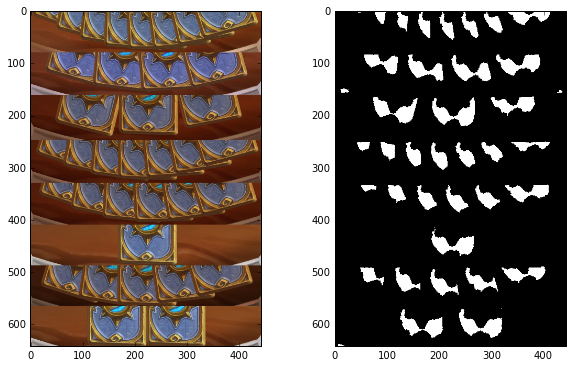

In [161]:
pom = img[:,:,2]
pom = skimage.exposure.equalize_adapthist(pom)

neg = np.zeros_like(pom)
neg[pom > 130/255.0] = 1

# b = img[:,:,0]
# b = skimage.exposure.equalize_adapthist(b)

# a = np.zeros_like(b)
# a[b > 150/255.0] = 1
# a = skimage.morphology.dilation(a, skimage.morphology.disk(3))

pom = img[:,:,0]
pom = skimage.exposure.equalize_adapthist(pom)

a = np.zeros_like(pom)
a[pom > 175/255.0] = 1

pom = img[:,:,1]
pom = skimage.exposure.equalize_adapthist(pom)
a[pom > 175/255.0] = 1

neg[a>0]=0

neg = skimage.morphology.dilation(neg, skimage.morphology.disk(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.star(5))
# neg = skimage.morphology.dilation(neg, skimage.morphology.disk(4))
# neg = skimage.morphology.dilation(neg, skimage.morphology.disk(4))
# neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(4))

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
ax[0].imshow(img)
ax[1].imshow(neg, cmap=plt.cm.gray)

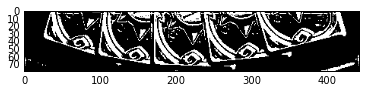

In [107]:
pom = img[:,:,0]
pom = skimage.exposure.equalize_adapthist(pom)

neg = np.zeros_like(pom)
neg[pom > 150/255.0] = 1

pom = img[:,:,1]
pom = skimage.exposure.equalize_adapthist(pom)
neg[pom > 150/255.0] = 1

# neg = skimage.morphology.erosion(neg, skimage.morphology.square(5))

plt.imshow(neg, cmap=plt.cm.gray)

In [105]:
def opponent_cards(image):
    segment = image[:,:,1].copy()
    n = 80
    segment[segment < n] = 0
    segment[segment >= n] = 1

    segment2 = image[:,:,0].copy()
    n = 140
    segment2[segment2 < n] = 0
    segment2[segment2 >= n] = 1

    segment3 = image[:,:,0].copy()
    n = 145
    segment3[segment3 < n] = 0
    segment3[segment3 >= n] = 1

    segmented = segment+segment2+segment3
    segmented[segmented > 0] = 1

    segmented = ndimage.binary_fill_holes(segmented)

    segmented = skimage.morphology.opening(segmented, skimage.morphology.star(8))
    
    b = skimage.measure.label(segmented)
    
    fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
    ax[0].imshow(image)
    ax[1].imshow(b)
    
    return len(np.unique(b)) - 1

In [43]:
from hearthstone.processing import Factory

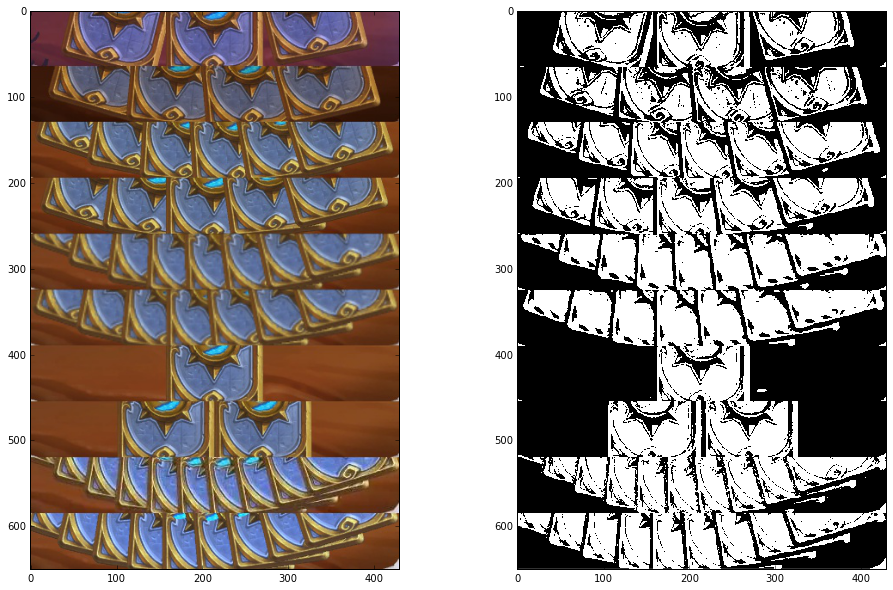

In [40]:
img = skimage.io.imread('data/opponent_cards_full.jpg')
segment = img[:,:,1].copy()

n = 85
segment[segment < n] = 0
segment[segment >= n] = 1

segment2 = img[:,:,0].copy()
n = 180
segment2[segment2 < n] = 0
segment2[segment2 >= n] = 1

segment3 = img[:,:,0].copy()
n = 200
segment3[segment3 < n] = 0
segment3[segment3 >= n] = 1

segmented = segment+segment2+segment3
segmented[segmented > 0] = 1

# segmented = ndimage.binary_fill_holes(segmented)
# segmented = skimage.morphology.opening(segmented, skimage.morphology.star(7))

fig, ax = plt.subplots(figsize=(16,10), nrows=1, ncols=2)
ax[0].imshow(img)
ax[1].imshow(segmented, cmap=plt.cm.gray, interpolation='none')

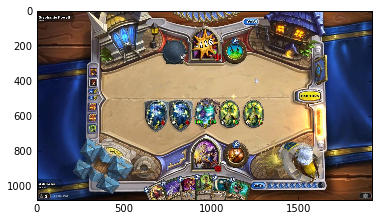

In [51]:
img = skimage.io.imread('data/opponents_cards/opponent_10_cards.jpg')

img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)

plt.imshow(img)

In [9]:
def opponent_cards(image):
    # Use mask
    mask = skimage.io.imread('../data/opponent_mask.png')
    mask = skimage.color.rgb2gray(mask)
    image[mask > 0] = 0
    
    
    segment = image[:,:,1].copy()
    n = 78
    segment[segment < n] = 0
    segment[segment >= n] = 1

    segment2 = image[:,:,0].copy()
    n = 185
    segment2[segment2 < n] = 0
    segment2[segment2 >= n] = 1

    segment3 = image[:,:,0].copy()
    n = 180
    segment3[segment3 < n] = 0
    segment3[segment3 >= n] = 1

    segmented = segment+segment2+segment3
    segmented[segmented > 0] = 1
    
    segmented = ndimage.binary_fill_holes(segmented)
    segmented = skimage.morphology.opening(segmented, skimage.morphology.star(4))
    
    return skimage.measure.label(segmented)

    # segmented = ndimage.binary_fill_holes(segmented)
    # segmented = skimage.morphology.opening(segmented, skimage.morphology.star(7))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 430 but corresponding boolean dimension is 410


8

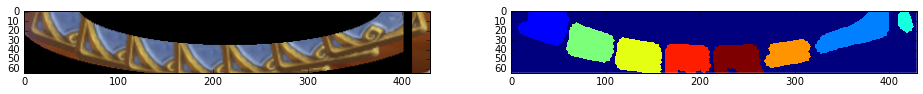

In [12]:
img = skimage.io.imread('../data/images/img005.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)

cards = Factory.cut_off_image(img, loc=(750, 0), shape=(410, 65))

cards_labels = opponent_cards(cards)

fig, ax = plt.subplots(figsize=(16,10), nrows=1, ncols=2)
ax[0].imshow(cards)
ax[1].imshow(cards_labels, interpolation='none')

len(np.unique(cards_labels)) - 1

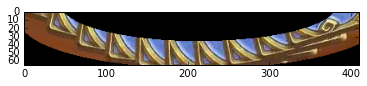

In [199]:
mask = skimage.io.imread('data/opponent_mask.png')
mask = skimage.color.rgb2gray(mask)

cards2 = cards.copy()
cards2[mask > 0] = 0

plt.imshow(cards)

# Player Cards Detection

In [2]:
from hearthstone.processing import Factorytory

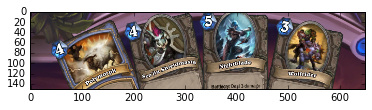

In [5]:
img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-02-17 11.42.36.png')

img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, np.uint8)

img = Factory.cut_off_image(img, (590, 930), (650, 150))

plt.imshow(img)

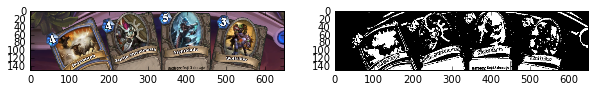

In [35]:
segment = img[:,:,1].copy()

n = 120
segment[segment < n] = 0
segment[segment >= n] = 1

segment2 = img[:,:,0].copy()
n = 150
segment2[segment2 < n] = 0
segment2[segment2 >= n] = 1

segment3 = img[:,:,0].copy()
n = 150
segment3[segment3 < n] = 0
segment3[segment3 >= n] = 1

segmented = segment+segment2+segment3
segmented[segmented > 0] = 1

segmented = ndimage.binary_fill_holes(segmented)
segmented = skimage.morphology.opening(segmented, skimage.morphology.star(8))

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
ax[0].imshow(img)
ax[1].imshow(segment, cmap=plt.cm.gray)